## Decision Tree Classifier Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris

In [6]:
dataset = load_iris()

In [8]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
import seaborn as sns

In [10]:
df=sns.load_dataset('iris')

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
##Independet and dependent features

In [16]:
X =df.iloc[:,:-1]
y=dataset.target

In [19]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
## post pruning
decision_tree = DecisionTreeClassifier()

In [25]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 

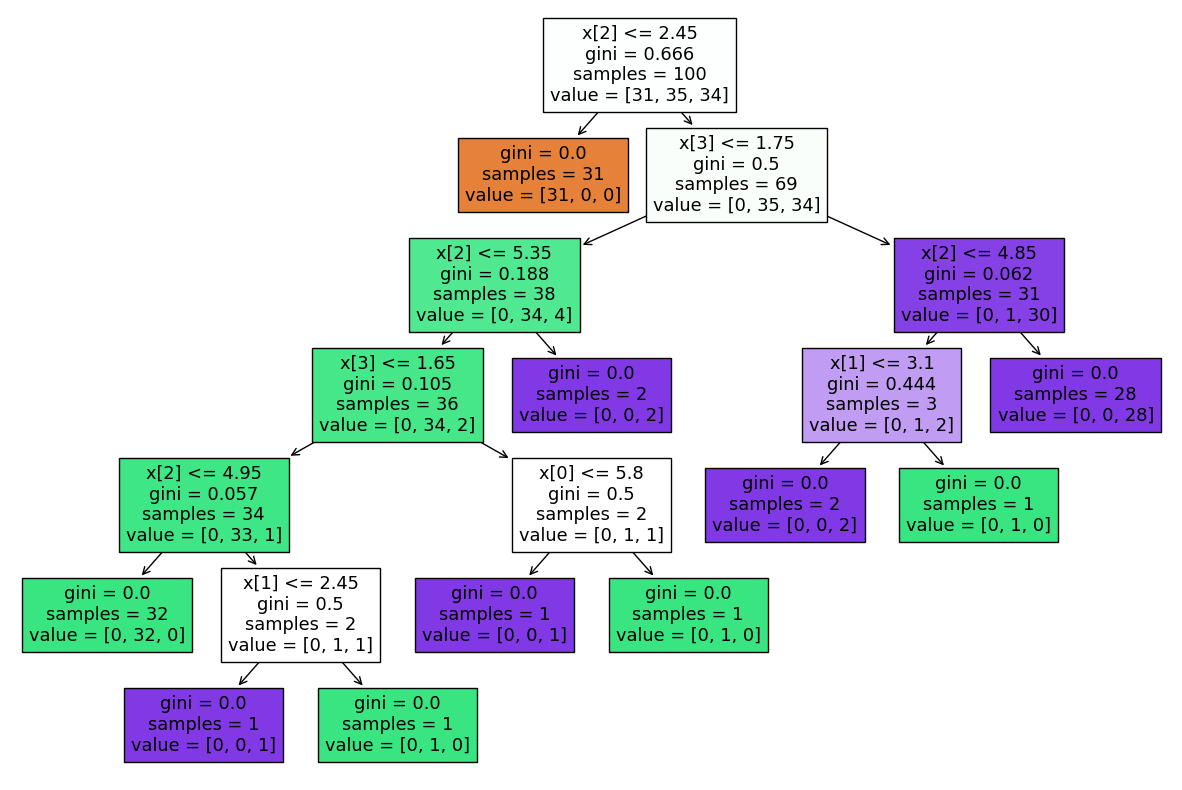

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)

In [30]:
## post pruning with max_depth=2
decision_trees = DecisionTreeClassifier(max_depth=2)
decision_trees.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

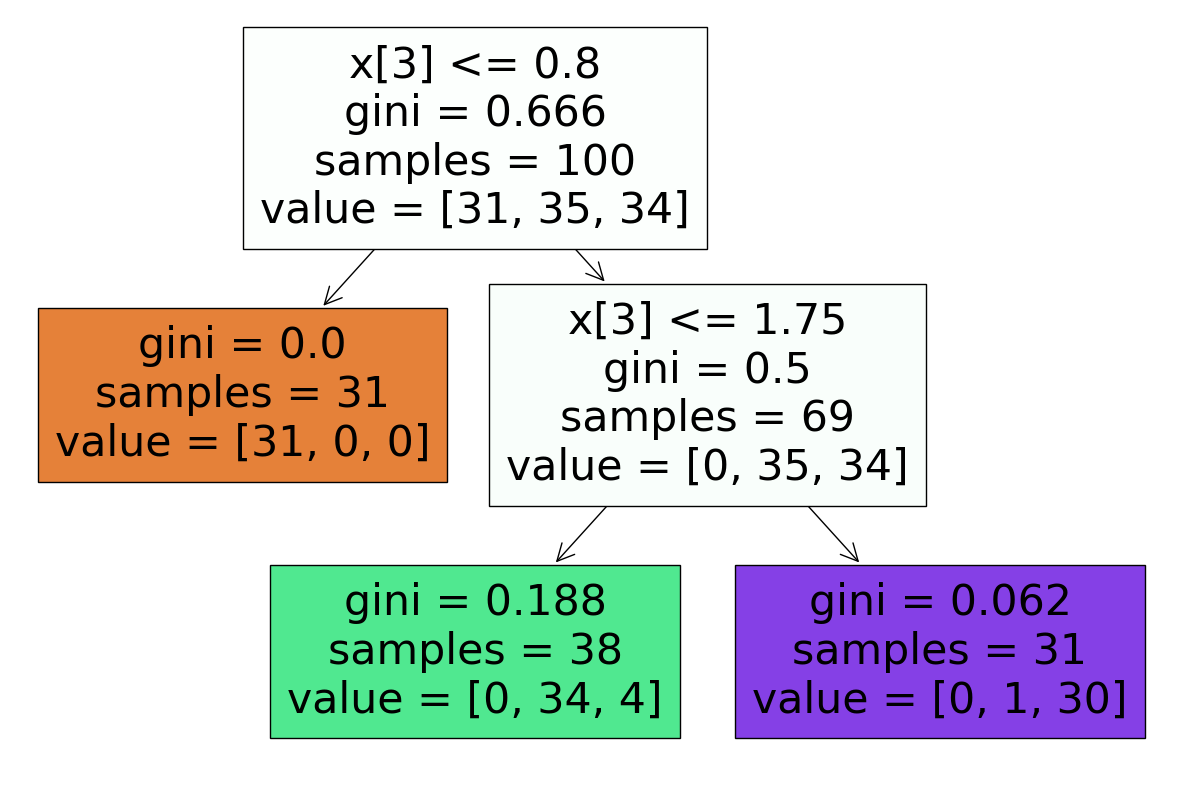

In [31]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_trees,filled=True)

In [32]:
#prediction
y_pred = decision_tree.predict(X_test)

In [33]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [34]:
from sklearn.metrics import accuracy_score,classification_report

In [35]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Decision tree prepruning and hyperparameter

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
parameter={
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt', 'log2']
}

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree,param_grid=parameter,cv=5,scoring='accuracy')

In [109]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [110]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [111]:
y_pred = clf.predict(X_test)

In [112]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [113]:
score = accuracy_score(y_pred,y_test)

In [114]:
score

0.96

In [115]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Decision Tree Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# independent feature

X=pd.DataFrame(california_df.data,columns=california_df.feature_names)

# dependent features

y= california_df.target

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [8]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
y_pred

array([0.487  , 0.521  , 5.00001, ..., 1.33   , 1.389  , 5.00001])

In [11]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)

In [12]:
score

0.5984188733346755

In [13]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [14]:
#https://scikit-learn.org/stable/modules/model_evaluation.html

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [15]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [17]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'best'}

In [18]:
y_pred=regressorcv.predict(X_test)

In [19]:
r2_score(y_pred,y_test)

0.5989991790586839